In [228]:
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

In [234]:
class LogisticRegression:
    def __init__(self, learningRate, tolerance, maxIteration, index_to_remove):
        self.tolerance = tolerance
        self.learningRate = learningRate
        self.maxIteration = maxIteration
        self.index_to_remove = index_to_remove

    def readDataset(self):
        train_df = pd.read_excel('Lab3_data.xls', sheet_name = '2004--2005 Data')
        test_df = pd.read_excel('Lab3_data.xls', sheet_name = '2004--2007 Data')

        train_df = np.array(train_df, dtype=np.float64)
        test_df = np.array(test_df, dtype=np.float64)

        X_train, y_train = train_df[:,1:], train_df[:,0]
        X_test, y_test = test_df[:,1:], test_df[:,0]

        return X_train, X_test, y_train, y_test

    def sigmoid(self, z):
        sig = 1/(1+np.exp(-z))
        return sig

    def costFunction(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        # approach1
        cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
        cost = -cost/X.shape[0]
        cost = cost.sum()
        return cost

    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        gradient = (sig-y).dot(X)
        return gradient
    
    def gradientDescent(self, X, y):
        errors = []
        last_error = float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            current_error = self.costFunction(X, y)
            diff = last_error - current_error
            last_error = current_error
            errors.append(current_error)

            if np.abs(diff) < self.tolerance:
                print('model stopped learning')
                break

    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)               
    
    def evaluate(self, y, y_hat):
        y = (y==1)
        y_hat = (y_hat == 1)                
        recall = (y & y_hat).sum()/y.sum()
        precision = (y & y_hat).sum()/y_hat.sum()
        f_score = 2*(precision*recall)/(precision+recall)
        return f_score, recall, precision
    
    def plot(self, X_train, y_train):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(X_train[:, 0], X_train[:, 1], 
                     self.sigmoid(X_train.dot(self.w)), 
                     c = y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)
        
    def scatterPlt(self, X_train, y_train):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(X_train[:, 0], X_train[:, 1], 
                   c=y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        
    def plot3D(self, X_train, y_train):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(X_train[:, 0], X_train[:, 1], 
                   c=y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()
    

    def remove_index(self,index, X_train, y_train):
        X_train_new_data = np.delete(X_train, index, axis=0)
        y_train_new_data = np.delete(y_train, index, axis=0)
        return X_train_new_data, y_train_new_data

    
    def fit(self):
        X_train, X_test, y_train, y_test = self.readDataset()
        print('Solving using Gradient Descent')
        self.w = np.ones(X_train.shape[1])
        
        if self.index_to_remove is not None:
            X_train, y_train = remove_index(self.index_to_remove, X_train, y_train)
        self.gradientDescent(X_train, y_train)
        print(self.w)
        
        y_train_hat = self.predict(X_train)
        f_score, recall, precision = self.evaluate(y_train, y_train_hat)
        print('Training F1 score after removing data points {}: {}'.format(self.index_to_remove, f_score))
        print('Training recall score after removing data points {}: {}'.format(self.index_to_remove, recall))
        print('Training precision score after removing data points {}: {}'.format(self.index_to_remove, precision))
        self.plot(X_train, y_train)
        self.scatterPlt(X_train, y_train)
        self.plot3D(X_train, y_train)
        
        
    

In [235]:
lr = LogisticRegression(learningRate = 0.0001, tolerance = 0.00005, maxIteration = 50000, index_to_remove= None)

Solving using Gradient Descent


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]C:\Users\aishw\AppData\Local\Temp\ipykernel_26196\3703713052.py:27: RuntimeWarning: divide by zero encountered in log
  cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
C:\Users\aishw\AppData\Local\Temp\ipykernel_26196\3703713052.py:27: RuntimeWarning: invalid value encountered in multiply
  cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 29107.67it/s]


[-1.1032108   0.55326721]
Training F1 score after removing data points None: 0.9459459459459458
Training recall score after removing data points None: 0.9722222222222222
Training precision score after removing data points None: 0.9210526315789473


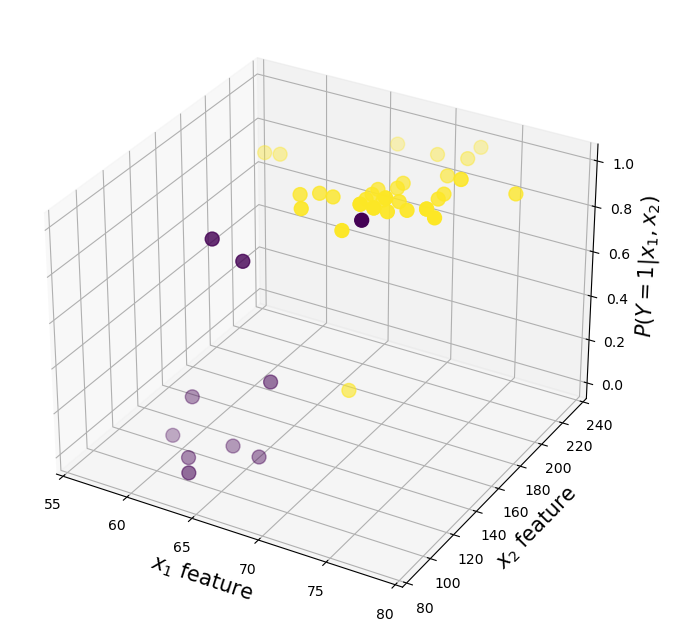

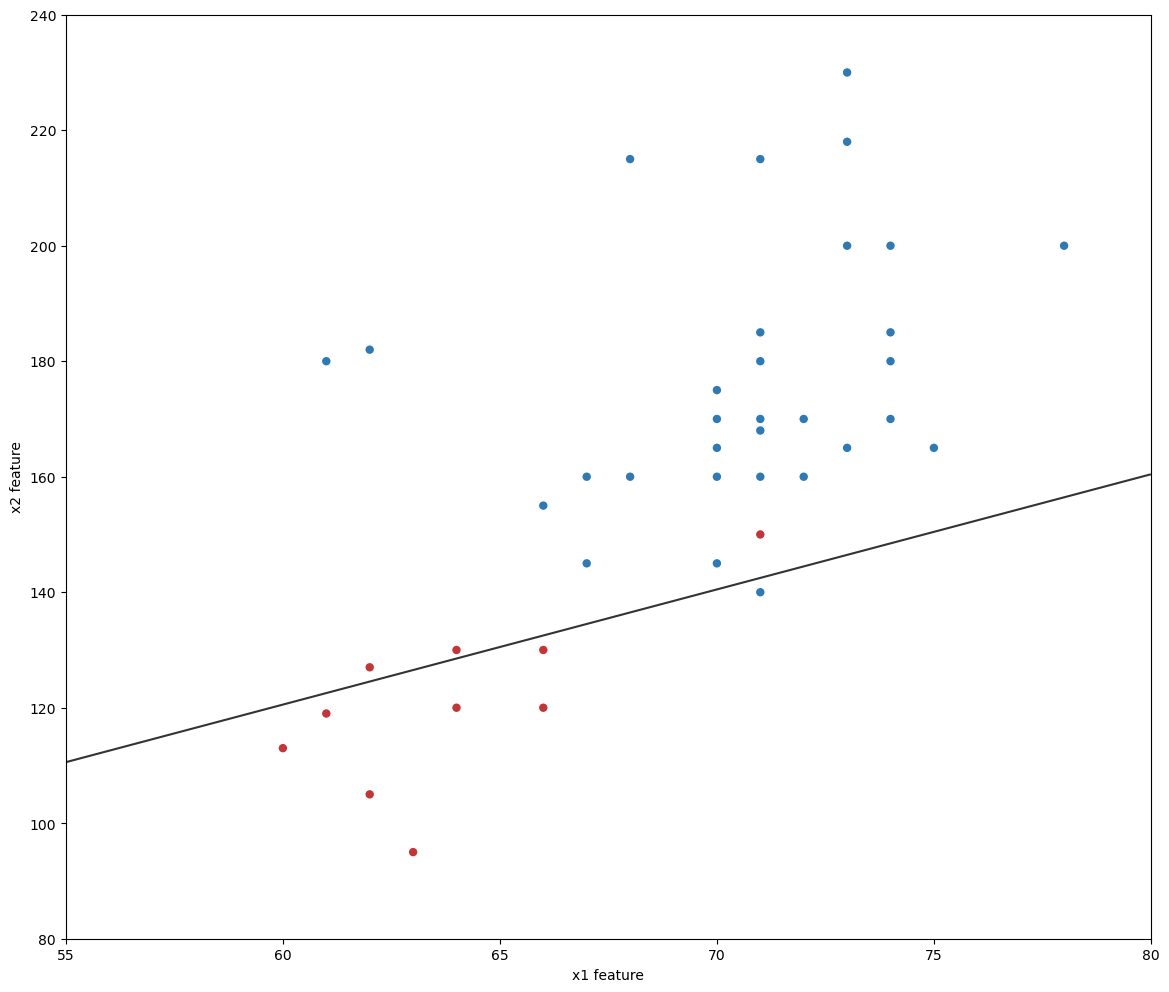

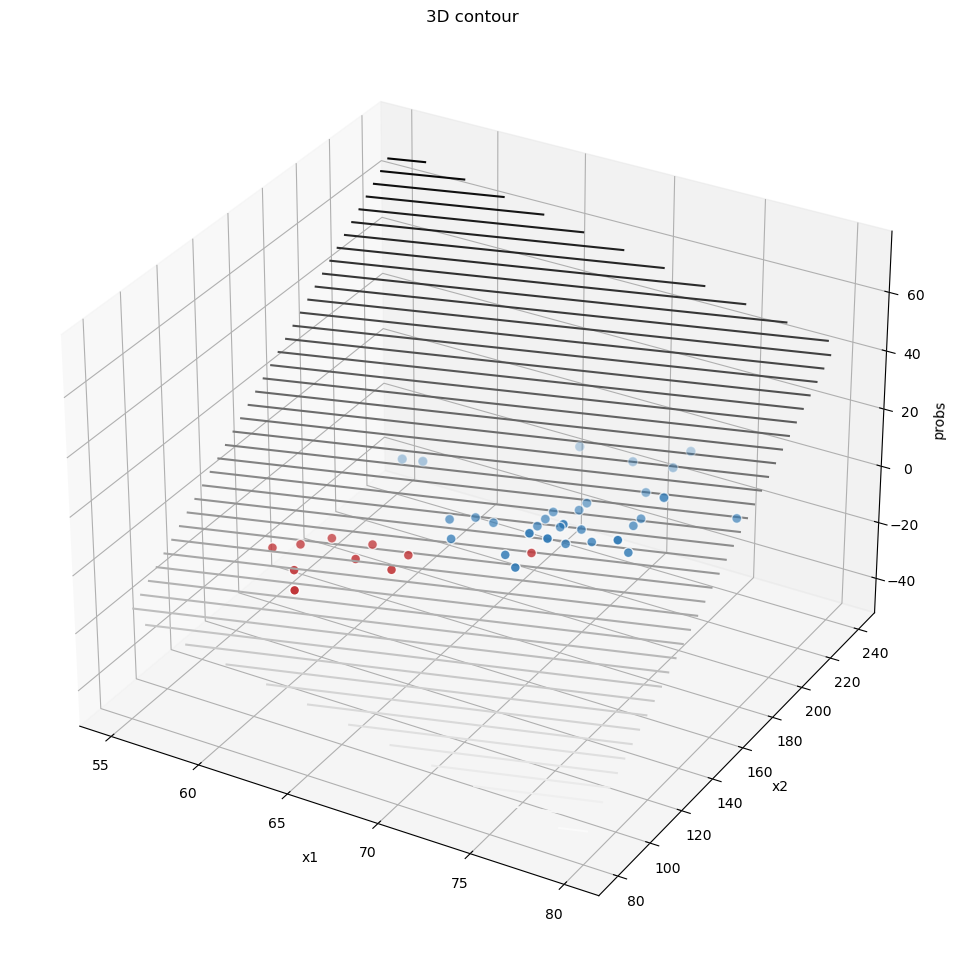

In [236]:
lr.fit()

In [237]:
lr = LogisticRegression(learningRate = 0.0001, tolerance = 0.00005, maxIteration = 50000, index_to_remove= [0,38])

Solving using Gradient Descent


  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]C:\Users\aishw\AppData\Local\Temp\ipykernel_26196\3703713052.py:27: RuntimeWarning: divide by zero encountered in log
  cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
C:\Users\aishw\AppData\Local\Temp\ipykernel_26196\3703713052.py:27: RuntimeWarning: invalid value encountered in multiply
  cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 24848.78it/s]


[-2.65401423  1.2873003 ]
Training F1 score after removing data points [0, 38]: 1.0
Training recall score after removing data points [0, 38]: 1.0
Training precision score after removing data points [0, 38]: 1.0


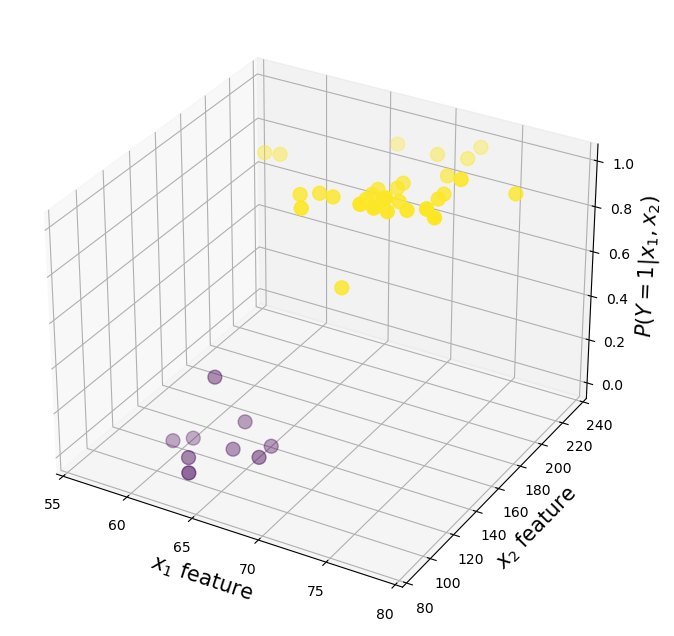

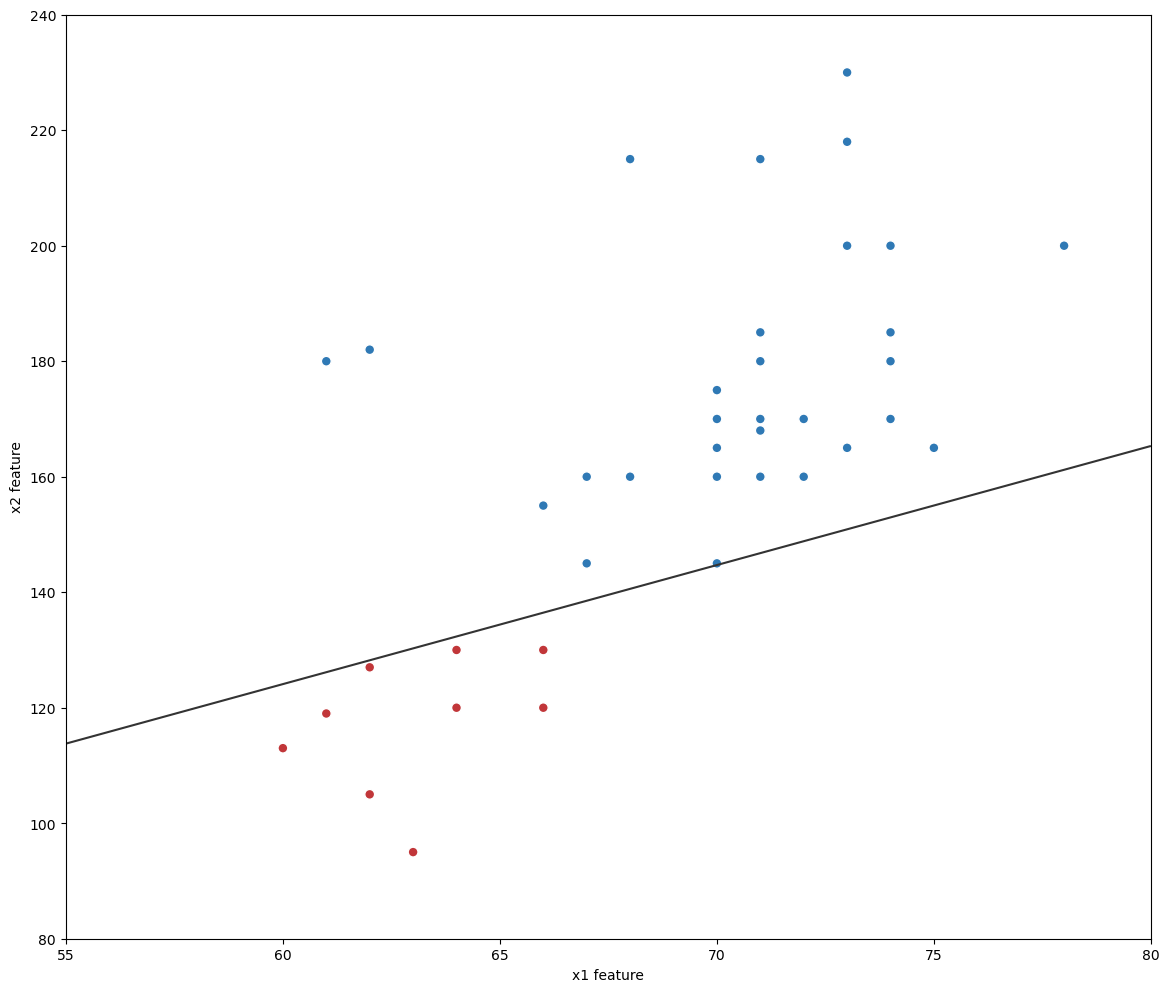

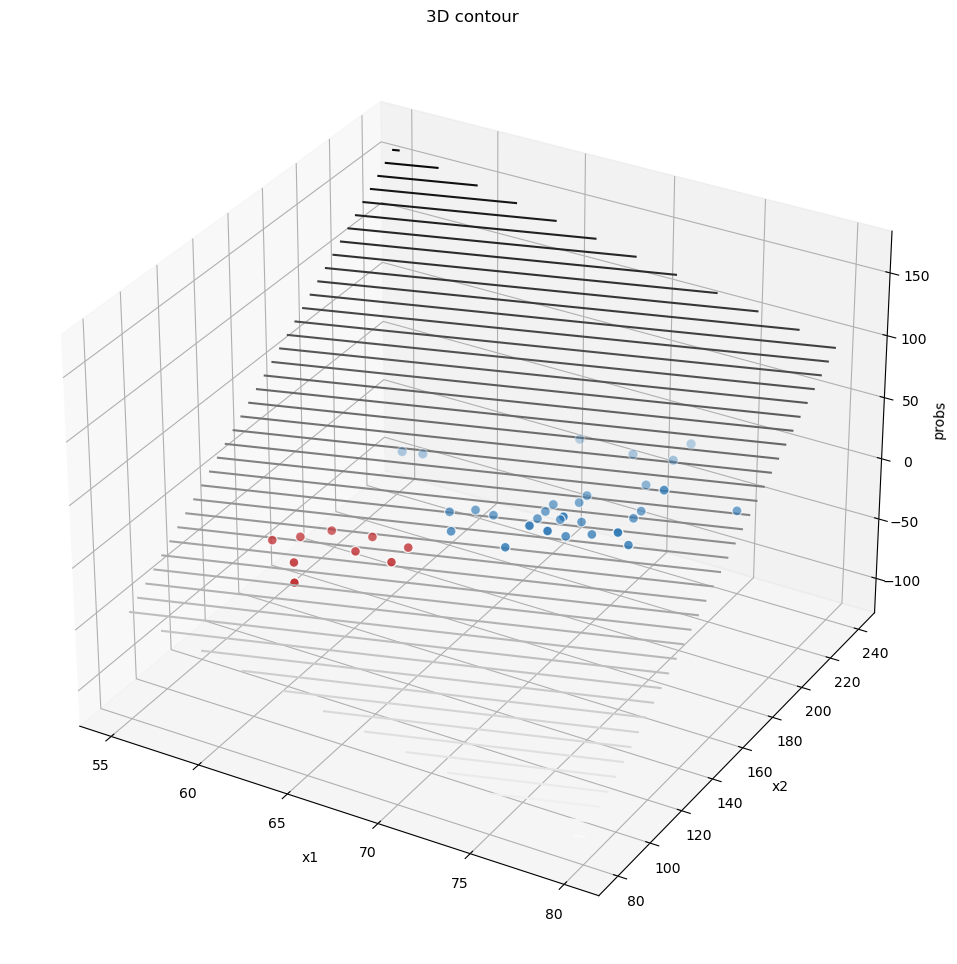

In [238]:
lr.fit()

Data point number 1 and 39 has a large effect on the predicted probability of the model. In the initial plots with no indices removed, you can observe misclassfied points. When we removed 1 and 39, these points got removed and decision boundary clearly classfies x1 and x2 features. Due to this, the model performance (accuracy etc.) went up.